In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import xlsxwriter

In [2]:
weather = pd.read_excel('weather_vitebsk.xls', skiprows=6)   # пропускаем первых 6 строк

In [3]:
weather.head()

,Местное время в Витебске (аэропорт),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,29.12.2020 06:00,-1.1,743.2,759.8,-0.9,94,"Ветер, дующий с юга",2,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,7,-1.9,NaN,NaN,NaN,NaN,NaN,NaN
1,29.12.2020 03:00,-1.0,744.1,760.6,-0.8,91,"Ветер, дующий с юго-юго-востока",3,NaN,12.0,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,9,-2.3,NaN,NaN,NaN,NaN,NaN,NaN
2,29.12.2020 00:00,-1.3,744.9,761.5,-0.7,88,"Ветер, дующий с юга",3,NaN,12.0,...,NaN,NaN,8,-3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,28.12.2020 21:00,-1.8,745.6,762.2,-1.3,73,"Ветер, дующий с юго-востока",5,12.0,13.0,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,28,-6.0,Следы осадков,12.0,NaN,NaN,NaN,NaN
4,28.12.2020 18:00,-1.8,746.9,763.6,-0.8,73,"Ветер, дующий с юго-востока",3,NaN,10.0,...,NaN,NaN,30,-6.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather.describe()

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,Td,tR,E,Tg
count,17511.000000,17431.000000,17431.000000,17262.000000,17511.000000,17511.000000,959.000000,3484.000000,1778.000000,2100.000000,17511.000000,2251.0,0.0,0.0
mean,7.720513,745.644880,761.650668,0.001570,77.222089,2.003997,10.716371,11.647819,5.086333,11.979524,3.380081,12.0,NaN,NaN
std,9.499756,7.150977,7.374099,0.869953,18.237671,1.406961,1.138092,1.898280,7.991487,10.571707,8.190705,0.0,NaN,NaN
min,-29.700000,715.900000,731.400000,-5.900000,18.000000,0.000000,10.000000,10.000000,-30.100000,-23.100000,-32.800000,12.0,NaN,NaN
25%,0.500000,741.100000,757.000000,-0.500000,65.000000,1.000000,10.000000,10.000000,-0.500000,2.800000,-2.100000,12.0,NaN,NaN
50%,7.100000,745.700000,761.500000,0.000000,83.000000,2.000000,10.000000,11.000000,5.500000,11.900000,2.900000,12.0,NaN,NaN
75%,15.300000,750.200000,766.300000,0.500000,92.000000,3.000000,11.000000,13.000000,11.400000,21.125000,10.200000,12.0,NaN,NaN
max,34.100000,771.400000,788.500000,4.500000,100.000000,8.000000,17.000000,27.000000,23.400000,34.500000,21.900000,12.0,NaN,NaN


In [5]:
weather.shape

(17511, 29)

In [6]:
print('Максимальная температура: ', weather['T'].max())
print('Минимальная температура: ', weather['T'].min())

Максимальная температура:  34.1
Минимальная температура:  -29.7


In [7]:
weather['date'] = pd.to_datetime(weather['Местное время в Витебске (аэропорт)'], dayfirst=True)   # в привычный формат день в начале

In [8]:
weather['day'] = weather['date'].dt.day
weather['month'] = weather['date'].dt.month
weather['year'] = weather['date'].dt.year   # колонки с другимформатом времени 

In [9]:
weather.head()

,Местное время в Витебске (аэропорт),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,RRR,tR,E,Tg,E',sss,date,day,month,year
0,29.12.2020 06:00,-1.1,743.2,759.8,-0.9,94,"Ветер, дующий с юга",2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-29 06:00:00,29,12,2020
1,29.12.2020 03:00,-1.0,744.1,760.6,-0.8,91,"Ветер, дующий с юго-юго-востока",3,NaN,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-29 03:00:00,29,12,2020
2,29.12.2020 00:00,-1.3,744.9,761.5,-0.7,88,"Ветер, дующий с юга",3,NaN,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-29 00:00:00,29,12,2020
3,28.12.2020 21:00,-1.8,745.6,762.2,-1.3,73,"Ветер, дующий с юго-востока",5,12.0,13.0,...,Следы осадков,12.0,NaN,NaN,NaN,NaN,2020-12-28 21:00:00,28,12,2020
4,28.12.2020 18:00,-1.8,746.9,763.6,-0.8,73,"Ветер, дующий с юго-востока",3,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-28 18:00:00,28,12,2020


In [10]:
weather.groupby(['year'])['T'].mean()   # средняя температура по годам

year
2015    8.213297
2016    7.057206
2017    6.970034
2018    7.151712
2019    8.219287
2020    8.718651
Name: T, dtype: float64

In [11]:
weather.groupby(['month'])['T'].mean()   # средняя по месяцам

month
1     -4.299530
2     -2.098971
3      1.601478
4      7.296734
5     13.592876
6     18.120694
7     18.003024
8     18.432258
9     13.491389
10     6.915276
11     1.555625
12    -0.625034
Name: T, dtype: float64

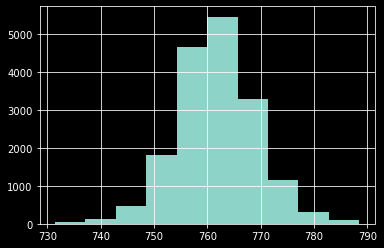

In [12]:
weather['P'].hist()

In [13]:
print('Максимальное атмосферное давление: ', weather['Po'].max())
print('Минимальное атмосферное давление: ', weather['Po'].min())

Максимальное атмосферное давление:  771.4
Минимальное атмосферное давление:  715.9


In [14]:
weather[(weather['year']) & (weather['T'] == -29.7)]   # дата с минимальной температурой
#print('Дата с минимальной температурой: ', weather[(weather['year']) & (weather['T'] == -29.7)])

,Местное время в Витебске (аэропорт),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,RRR,tR,E,Tg,E',sss,date,day,month,year
11605,08.01.2017 09:00,-29.7,755.0,773.8,0.4,74,"Ветер, дующий с северо-северо-востока",1,NaN,NaN,...,NaN,NaN,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,14,2017-01-08 09:00:00,8,1,2017


In [15]:
weather['Ff'].min()

0

In [16]:
weather['Ff'].mean()

2.003997487293701

In [17]:
weather['T'].mean()

7.720512820512821

In [18]:
weather[(weather.day==29) & (weather.month==12) & (weather.year==2019)]

,Местное время в Витебске (аэропорт),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,RRR,tR,E,Tg,E',sss,date,day,month,year
2922,29.12.2019 21:00,-5.0,758.2,775.3,-0.5,98,"Ветер, дующий с запада",2,NaN,NaN,...,0.5,12.0,NaN,NaN,NaN,NaN,2019-12-29 21:00:00,29,12,2019
2923,29.12.2019 18:00,-5.3,758.7,775.9,-0.2,97,"Ветер, дующий с запада",1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-29 18:00:00,29,12,2019
2924,29.12.2019 15:00,-5.4,758.9,776.1,-0.7,95,"Ветер, дующий с северо-запада",1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-29 15:00:00,29,12,2019
2925,29.12.2019 12:00,-5.1,759.6,776.8,0.7,96,"Ветер, дующий с севера",2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-29 12:00:00,29,12,2019
2926,29.12.2019 09:00,-4.8,758.9,776.0,0.6,95,"Ветер, дующий с севера",2,NaN,NaN,...,0.2,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,9,2019-12-29 09:00:00,29,12,2019
2927,29.12.2019 06:00,-4.2,758.3,775.4,0.7,95,"Ветер, дующий с севера",3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-29 06:00:00,29,12,2019
2928,29.12.2019 03:00,-3.2,757.6,774.7,0.7,91,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-29 03:00:00,29,12,2019
2929,29.12.2019 00:00,-2.6,756.9,773.8,1.0,94,"Ветер, дующий с северо-северо-востока",3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-29 00:00:00,29,12,2019


In [19]:
weather.WW

0        Дождь замерзающий слабый.  Диаметр отложения п...
1                               Дождь замерзающий слабый. 
2        Дождь замерзающий слабый.  Диаметр отложения п...
3                   Состояние неба в общем не изменилось. 
4        Замерзающая морось или замерзающий дождь нелив...
                               ...                        
17506    Туман или ледяной туман, неба не видно, началс...
17507    Туман или ледяной туман, неба не видно, без за...
17508    Туман или ледяной туман, неба не видно, без за...
17509    Морось замерзающая слабая.  Диаметр отложения ...
17510    Морось замерзающая слабая.  Диаметр отложения ...
Name: WW, Length: 17511, dtype: object

In [20]:
weather.WW.max()   # самое длинное

'Умеренный или сильный дождь в срок наблюдения. Гроза в течение последнего часа, но не в срок наблюдения. '

In [21]:
n = 10
weather['WW'].value_counts()[:n].index.tolist()   # 10 самых часто повторяющихся без количества повторений

[' ',
 'Дымка. ',
 'Состояние неба в общем не изменилось. ',
 'Снег непрерывный слабый в срок наблюдения. ',
 'Дождь незамерзающий непрерывный слабый в срок наблюдения. ',
 'Ливневый(ые) дождь(и). ',
 'Ливневый(ые) дождь(и) слабый(ые) в срок наблюдения или за последний час. ',
 'Снег неливневый. ',
 'Дождь (незамерзающий) неливневый. ',
 'Снег с перерывами слабый в срок наблюдения. ']

In [22]:
weather['WW'].value_counts().max()

9274

In [23]:
weather['WW'].value_counts()[:4]   # 3 самых частых повторения и сколько


                                               9274
Дымка.                                         1962
Состояние неба в общем не изменилось.          1672
Снег непрерывный слабый в срок наблюдения.      633
Name: WW, dtype: int64

In [24]:
weather['WW'].value_counts() # сколько повторений каждого в колонке

                                                                                                                                 9274
Дымка.                                                                                                                           1962
Состояние неба в общем не изменилось.                                                                                            1672
Снег непрерывный слабый в срок наблюдения.                                                                                        633
Дождь незамерзающий непрерывный слабый в срок наблюдения.                                                                         594
                                                                                                                                 ... 
Снег неливневый.  Диаметр отложения мокрого снега составляет 3 мм.                                                                  1
Ливневый град, или дождь и град.  Максимальный диаметр градин 

In [32]:
# средняя тепература при ветре DD == штиль, безветрие
weather[(weather['DD'] == 'Штиль, безветрие')]['T'].mean()

7.458682842287694

In [26]:
# при ветре Ff == 0
weather[(weather["Ff"] == 0)]["T"].describe()

count    2885.000000
mean        7.458683
std         9.580859
min       -29.500000
25%         0.600000
50%         9.000000
75%        14.800000
max        32.100000
Name: T, dtype: float64